In [1]:
import numpy as np
import networkx as nx
import os
from random import shuffle          # importamos las librerias necesarias
import matplotlib.pylab as plt       
%matplotlib inline
from matplotlib.pyplot import title,xlabel,ylabel,show

In [2]:
G = nx.read_gml('dolphins.gml') # definimos la red:cada nodo es un delfin y cada conexion representa una interaccion

In [3]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

dolphinsGender=ldata('dolphinsGender.txt') # usamos la funcion "ldata" para abrir el archivo .txt 

In [4]:
dict_gender = {dolphin_nombre : genero for dolphin_nombre, genero  in dolphinsGender}
for n in G.nodes:
    G.nodes[n]["gender"] = dict_gender[n] 

In [5]:
#import igraph as igraph
import networkx as nx
#import community
import time

# ITEM C DE COMPARAR LOS DISTINTOS CRITERIOSSS 

In [6]:
####voy a calcular la matriz de concurrencia dadas las listas de listas de los distintos criterios de clustering 
#tomo como argumento un diccionario donde dice el nombre del delfin y a que comunidad pertenece que en este caso es 
#edgeBetweenessAtrib
#edgeBetweenessAtrib = nx.get_node_attributes(G,"betweenness")
def MatrixConcurrency(attrib1, attrib2):
    amountCommunities1 = max(attrib1.values())
    amountCommunities2 = max(attrib2.values())    
    amountCommunitiesMaximum = max(amountCommunities1,amountCommunities2)
    matrix = np.zeros((amountCommunitiesMaximum+1,amountCommunitiesMaximum+1))
    for i in range(amountCommunitiesMaximum+1):
        for j in range(amountCommunitiesMaximum+1):
            subGraph1 = [k for k,v in attrib1.items() if v == i]
            subGraph2 = [k for k,v in attrib2.items() if v == j]
            overlap = len(set(subGraph1).intersection(set(subGraph2)))
            matrix[i][j] = overlap
            #matrix[j][i] = overlap 
    return matrix 
        

In [7]:
#voy a ordenar las comunidades de mayor a menor cantidad antes de ver el overlap
import scipy.stats as ss

def ordenComunidades(attrib1):    
    CantidadComunidad = []
    amountCommunities1 = max(attrib1.values())
    for i in range(amountCommunities1+1):
        cantidadComunidad = len([k for k,v in attrib1.items() if v == i])
        CantidadComunidad.append(cantidadComunidad)
        rank = ss.rankdata(CantidadComunidad)-1
    return rank 
    

In [8]:
#al final no lo uso 
def finalOrden(rank):    
    a = range(5)
    com = np.zeros(len(a))
    for k in range(len(rank)): 
        if rank[k] == 0:
            com[0] = a[k]
        if rank[k] == 1:
            com[1] = a[k] 
        if rank[k] == 2:
            com[2] = a[k]
        if rank[k] == 3:
            com[3] = a[k]
        if rank[4] == 0:
            com[4] = a[k]
    return com

In [9]:
#al final no lo uso 
def finalOrden2(rank):    
    a = range(4)
    com = np.zeros(len(a))
    for k in range(len(rank)): 
        if rank[k] == 0:
            com[0] = a[k]
        if rank[k] == 1:
            com[1] = a[k] 
        if rank[k] == 2:
            com[2] = a[k]
        if rank[k] == 3:
            com[3] = a[k]
    return com

In [10]:
#esta no importa 
def ProbConj(attrib1, attrib2, ordencom1, ordencom2):
    amountCommunities1 = max(attrib1.values())
    amountCommunities2 = max(attrib2.values())    
    amountCommunitiesMaximum = max(amountCommunities1,amountCommunities2)
    matrix = np.zeros((amountCommunitiesMaximum+1,amountCommunitiesMaximum+1))
    for i in ordencom1:
        for j in ordencom2:
            subGraph1 = [k for k,v in attrib1.items() if v == ordencom1]
            subGraph2 = [k for k,v in attrib2.items() if v == ordencom2]
            overlap = len(set(subGraph1).intersection(set(subGraph2)))
            matrix[i][j] = 100*(overlap/len(attrib1))
            #matrix[j][i] = overlap 
    return matrix 


In [11]:
def ProbConj2(attrib1, attrib2, ordencom1, ordencom2):
    amountCommunities1 = max(attrib1.values())
    amountCommunities2 = max(attrib2.values())    
    #amountCommunitiesMaximum = max(amountCommunities1,amountCommunities2)
    matrix = np.zeros((amountCommunities1+1,amountCommunities2+1))
    for i in range(len(ordencom1)):
        for j in range(len(ordencom2)):
            subGraph1 = [k for k,v in EdgeBet.items() if v == ordenEBF[i]]
            subGraph2 = [k for k,v in Louvain.items() if v == ordenLF[j]]
            overlap = len(set(subGraph1).intersection(set(subGraph2)))
            matrix[i][j] = (overlap/len(attrib1))
            #matrix[j][i] = overlap 
    return matrix 


In [12]:
EdgeBet = {'Beak': 4,
 'Beescratch': 0,
 'Bumper': 4,
 'CCL': 2,
 'Cross': 1,
 'DN16': 0,
 'DN21': 0,
 'DN63': 0,
 'Double': 2,
 'Feather': 0,
 'Fish': 4,
 'Five': 1,
 'Fork': 2,
 'Gallatin': 0,
 'Grin': 2,
 'Haecksel': 1,
 'Hook': 2,
 'Jet': 0,
 'Jonah': 1,
 'Knit': 0,
 'Kringel': 2,
 'MN105': 1,
 'MN23': 0,
 'MN60': 1,
 'MN83': 1,
 'Mus': 0,
 'Notch': 0,
 'Number1': 0,
 'Oscar': 4,
 'PL': 4,
 'Patchback': 1,
 'Quasi': 0,
 'Ripplefluke': 0,
 'SMN5': 1,
 'SN100': 2,
 'SN4': 2,
 'SN63': 2,
 'SN89': 0,
 'SN9': 2,
 'SN90': 0,
 'SN96': 4,
 'Scabs': 2,
 'Shmuddel': 2,
 'Stripes': 2,
 'TR120': 2,
 'TR77': 4,
 'TR82': 0,
 'TR88': 2,
 'TR99': 2,
 'TSN103': 2,
 'TSN83': 3,
 'Thumper': 2,
 'Topless': 1,
 'Trigger': 1,
 'Upbang': 0,
 'Vau': 1,
 'Wave': 0,
 'Web': 0,
 'Whitetip': 2,
 'Zap': 2,
 'Zig': 0,
 'Zipfel': 3}

In [13]:
FastGredy = {'Beak': 0,
 'Beescratch': 1,
 'Bumper': 0,
 'CCL': 2,
 'Cross': 2,
 'DN16': 1,
 'DN21': 1,
 'DN63': 1,
 'Double': 2,
 'Feather': 1,
 'Fish': 0,
 'Five': 2,
 'Fork': 0,
 'Gallatin': 1,
 'Grin': 0,
 'Haecksel': 2,
 'Hook': 0,
 'Jet': 1,
 'Jonah': 2,
 'Knit': 1,
 'Kringel': 0,
 'MN105': 2,
 'MN23': 1,
 'MN60': 2,
 'MN83': 2,
 'Mus': 1,
 'Notch': 1,
 'Number1': 1,
 'Oscar': 1,
 'PL': 1,
 'Patchback': 2,
 'Quasi': 1,
 'Ripplefluke': 1,
 'SMN5': 2,
 'SN100': 3,
 'SN4': 0,
 'SN63': 0,
 'SN89': 3,
 'SN9': 0,
 'SN90': 1,
 'SN96': 0,
 'Scabs': 0,
 'Shmuddel': 0,
 'Stripes': 0,
 'TR120': 0,
 'TR77': 0,
 'TR82': 1,
 'TR88': 0,
 'TR99': 0,
 'TSN103': 0,
 'TSN83': 0,
 'Thumper': 0,
 'Topless': 2,
 'Trigger': 2,
 'Upbang': 1,
 'Vau': 2,
 'Wave': 1,
 'Web': 1,
 'Whitetip': 0,
 'Zap': 2,
 'Zig': 1,
 'Zipfel': 0}

In [14]:
InfoMap = {'Beak': 3,
 'Beescratch': 0,
 'Bumper': 3,
 'CCL': 4,
 'Cross': 2,
 'DN16': 0,
 'DN21': 0,
 'DN63': 0,
 'Double': 4,
 'Feather': 0,
 'Fish': 3,
 'Five': 2,
 'Fork': 1,
 'Gallatin': 0,
 'Grin': 1,
 'Haecksel': 2,
 'Hook': 1,
 'Jet': 0,
 'Jonah': 2,
 'Knit': 0,
 'Kringel': 1,
 'MN105': 2,
 'MN23': 0,
 'MN60': 2,
 'MN83': 2,
 'Mus': 0,
 'Notch': 0,
 'Number1': 0,
 'Oscar': 3,
 'PL': 3,
 'Patchback': 2,
 'Quasi': 0,
 'Ripplefluke': 0,
 'SMN5': 2,
 'SN100': 4,
 'SN4': 1,
 'SN63': 1,
 'SN89': 4,
 'SN9': 1,
 'SN90': 0,
 'SN96': 3,
 'Scabs': 1,
 'Shmuddel': 1,
 'Stripes': 1,
 'TR120': 1,
 'TR77': 3,
 'TR82': 0,
 'TR88': 1,
 'TR99': 1,
 'TSN103': 1,
 'TSN83': 1,
 'Thumper': 1,
 'Topless': 2,
 'Trigger': 2,
 'Upbang': 0,
 'Vau': 2,
 'Wave': 0,
 'Web': 0,
 'Whitetip': 1,
 'Zap': 4,
 'Zig': 0,
 'Zipfel': 1}

In [15]:
Louvain = {'Beak': 0,
 'Beescratch': 1,
 'Bumper': 0,
 'CCL': 2,
 'Cross': 3,
 'DN16': 1,
 'DN21': 1,
 'DN63': 0,
 'Double': 2,
 'Feather': 1,
 'Fish': 0,
 'Five': 3,
 'Fork': 4,
 'Gallatin': 1,
 'Grin': 4,
 'Haecksel': 3,
 'Hook': 4,
 'Jet': 1,
 'Jonah': 3,
 'Knit': 0,
 'Kringel': 4,
 'MN105': 3,
 'MN23': 1,
 'MN60': 3,
 'MN83': 3,
 'Mus': 1,
 'Notch': 1,
 'Number1': 1,
 'Oscar': 2,
 'PL': 0,
 'Patchback': 3,
 'Quasi': 1,
 'Ripplefluke': 1,
 'SMN5': 3,
 'SN100': 2,
 'SN4': 4,
 'SN63': 4,
 'SN89': 2,
 'SN9': 4,
 'SN90': 1,
 'SN96': 0,
 'Scabs': 4,
 'Shmuddel': 4,
 'Stripes': 4,
 'TR120': 4,
 'TR77': 0,
 'TR82': 1,
 'TR88': 4,
 'TR99': 4,
 'TSN103': 4,
 'TSN83': 4,
 'Thumper': 4,
 'Topless': 3,
 'Trigger': 3,
 'Upbang': 1,
 'Vau': 3,
 'Wave': 1,
 'Web': 1,
 'Whitetip': 4,
 'Zap': 2,
 'Zig': 1,
 'Zipfel': 4}

In [16]:
#dice las comunidades de menor a mayor cantidad de nodos 
ordenEB = ordenComunidades(EdgeBet)
ordenEBF = [3,4,1,2,0]

ordenFG = ordenComunidades(FastGredy)
ordenFGF = [3,2,1,0]

ordenIM  = ordenComunidades(InfoMap)
ordenIMF = [4,3,2,1,0]

ordenL = ordenComunidades(Louvain)
ordenLF = [2,0,3,1,4]


In [17]:
#m = MatrixConcurrency(EdgeBet, FastGredy)
#ProbConj2(attrib1, attrib2, ordencom1, ordencom2)
p = np.round(ProbConj2(EdgeBet, Louvain, ordenEBF, ordenLF),3)*100

q = np.round(ProbConj2(EdgeBet, FastGredy, ordenEBF, ordenFGF),3)*100

k = np.round(ProbConj2(EdgeBet, InfoMap, ordenEBF, ordenIMF),3)*100
k

array([[ 0. ,  0. ,  0. ,  0. ,  3.2],
       [ 1.6,  9.7,  0. ,  0. ,  0. ],
       [ 0. ,  0. , 19.4,  0. ,  0. ],
       [ 6.5,  0. ,  0. ,  0. , 25.8],
       [ 1.6,  3.2,  0. , 29. ,  0. ]])

In [18]:
def amountNodesPerCommNormalized(attrib, orden):
    Nodes = []
    amountCommunities = max(attrib.values()) + 1 
    for i in orden:
        subGraph = [k for k,v in attrib.items() if v == i]
        nodesSub = len(set(subGraph))/len(attrib)
        Nodes.append(nodesSub)
    return Nodes
        

In [19]:
eb = amountNodesPerCommNormalized(EdgeBet,ordenEBF)
fg = amountNodesPerCommNormalized(FastGredy, ordenFGF)
im = amountNodesPerCommNormalized(InfoMap, ordenIMF)
l = amountNodesPerCommNormalized(Louvain, ordenLF)

fg.append(0)

(0, 1)

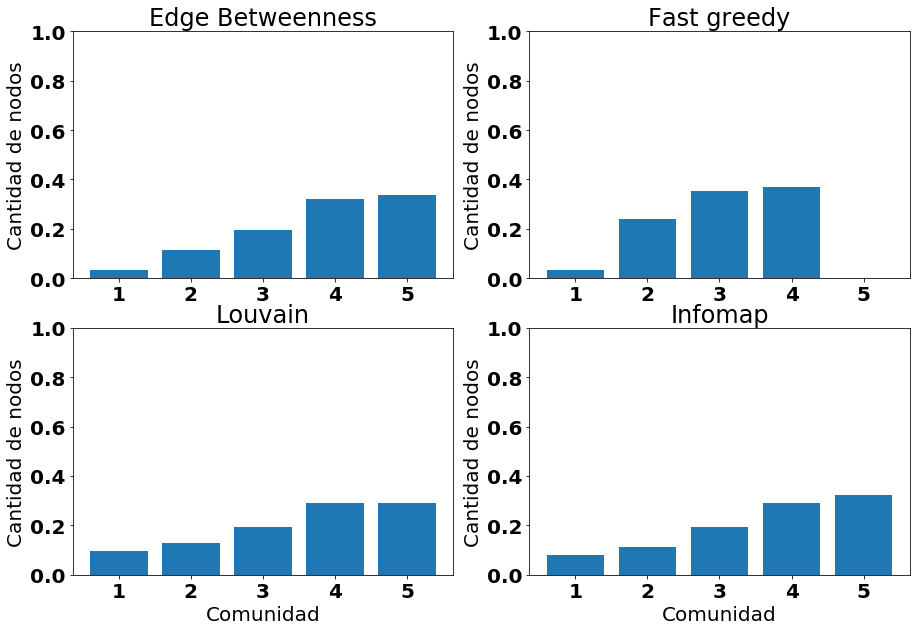

In [20]:
#puedo verlo en barras

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)
#plt.title("Cantidad de nodos por comunidad")

plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title("Edge Betweenness")
plt.bar([1,2,3,4,5],eb)
plt.xticks([1, 2, 3, 4,5])
#plt.xlabel("Comunidad")
plt.ylabel("Cantidad de nodos")
plt.ylim([0,1])

plt.subplot(222)
plt.title("Fast greedy")
plt.bar([1,2,3,4,5],fg)
plt.xticks([1, 2, 3, 4,5])
#plt.xlabel("Comunidad")
plt.ylabel("Cantidad de nodos")
plt.ylim([0,1])

plt.subplot(223)
plt.title("Louvain")
plt.bar([1,2,3,4,5],l)
plt.xticks([1, 2, 3, 4,5])
plt.xlabel("Comunidad")
plt.ylabel("Cantidad de nodos")
plt.ylim([0,1])


plt.subplot(224)
plt.title("Infomap")
plt.bar([1,2,3,4,5],im)
plt.xticks([1, 2, 3, 4,5])
plt.xlabel("Comunidad")
plt.ylabel("Cantidad de nodos")
plt.ylim([0,1])

In [21]:
#ya lo da en forma de vector 
eb = amountNodesPerCommNormalized(EdgeBet,ordenEBF)
fg = amountNodesPerCommNormalized(FastGredy, ordenFGF)
im = amountNodesPerCommNormalized(InfoMap, ordenIMF)
l = amountNodesPerCommNormalized(Louvain, ordenLF)

#la prob conjunta es ProbConj2(attrib1, attrib2, ordencom1, ordencom2)

In [22]:
def InfoMutua(attrib1, attrib2, ordencom1,ordencom2):
    probConj = ProbConj2(attrib1, attrib2, ordencom1, ordencom2)
    probC1 = amountNodesPerCommNormalized(attrib1,ordencom1)
    probC2 = amountNodesPerCommNormalized(attrib2,ordencom2)
    info = 0
    entropia1 = 0
    for k in probC1:
        entropia1 = entropia1 - k * np.log(k) 
    entropia2 = 0
    for j in probC2:
        entropia2 = entropia2 - j * np.log(j)
    for i in range(max(attrib1.values())+1):
        for j in range(max(attrib2.values())+1):
            if probConj[i,j] != 0:
                info = info + probConj[i,j] * np.log (probConj[i,j]/(probC1[i]*probC2[j]))
    infoMutua = (2*info) / (entropia1 + entropia2)
    return infoMutua

In [23]:
InfoMutua(EdgeBet, FastGredy, ordenEBF,ordenFGF)

0.5269396677105487

In [24]:

#InfoMutua(EdgeBet, FastGredy, ordenEBF,ordenFGF)
#InfoMutua(EdgeBet, Louvain, ordenEBF,ordenLF)
#InfoMutua(EdgeBet, InfoMap, ordenEBF,ordenIMF)
#InfoMutua(Louvain, FastGredy, ordenLF,ordenFGF)
#InfoMutua(InfoMap, FastGredy, ordenIMF,ordenFGF)
InfoMutua(Louvain, InfoMap, ordenLF,ordenIMF)

    

0.7879220090504659